In [50]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Abro el CSV que guardé de la fase 1 
df_unido = pd.read_csv("df_unido.csv")
df_unido.head()

,Unnamed: 0,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,11,2017,1,0,0,0,0,0.0,0,0
1,1,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,11,2017,2,3,0,3,2823,282.0,0,0
2,2,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,11,2017,3,0,0,0,0,0.0,0,0
3,3,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,11,2017,4,0,0,0,0,0.0,0,0
4,4,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,11,2018,10,6,2,8,3352,335.0,465,38


In [53]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   405624 non-null  int64  
 1   Loyalty Number               405624 non-null  int64  
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       405624 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year              405624 non-null  int64  
 13 

FASE 2 : visualizacion


In [ ]:
# 1 :¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

#hago un groupby para agrupar el año,mes y el total de clientes y uso un reset_index para que mantenga el indice numero tradicional.

reser_month = df_unido.groupby(['Year','Month'])['Flights Booked'].sum().reset_index()
reser_month

,Year,Month,Flights Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


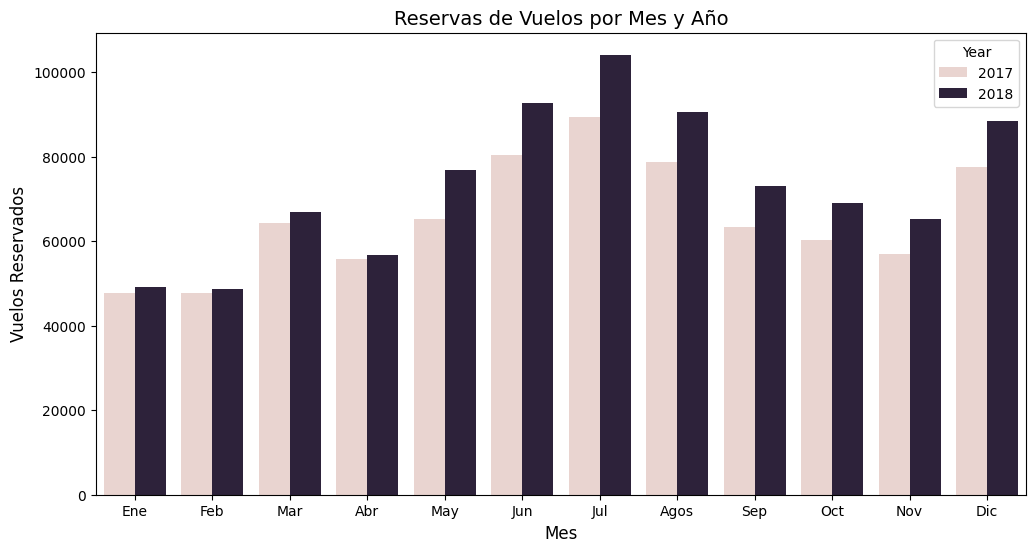

In [55]:
#Creo un grafico de barras

plt.figure(figsize=(12,6))
sns.barplot(data=reser_month,x='Month', y='Flights Booked', hue='Year');

# Etiquetas y título
plt.title('Reservas de Vuelos por Mes y Año', fontsize=14);
plt.xlabel('Mes', fontsize=12);
plt.ylabel('Vuelos Reservados', fontsize=12);
plt.xticks(ticks=range(12), labels=['Ene','Feb','Mar','Abr','May','Jun','Jul','Agos','Sep','Oct','Nov','Dic']);



Observo que los meses con mayor reserva de vuelos son en los meses de Mayo hasta Septiembre, llegando a verse un pico mas elevado en los meses e Julio y Diciembre, pudiendo ser esos meses con picos mas altos porque son epocas de vacaciones y puentes, donde suele ser mas elevado el volumen de las reservas.

In [ ]:
# 2: ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

#Aqui podemos comprobar que hay relacion directa entre distancia y puntos
print(df_unido[['Distance','Points Accumulated']].head())


   Distance  Points Accumulated
0         0                 0.0
1      2823               282.0
2         0                 0.0
3         0                 0.0
4      3352               335.0


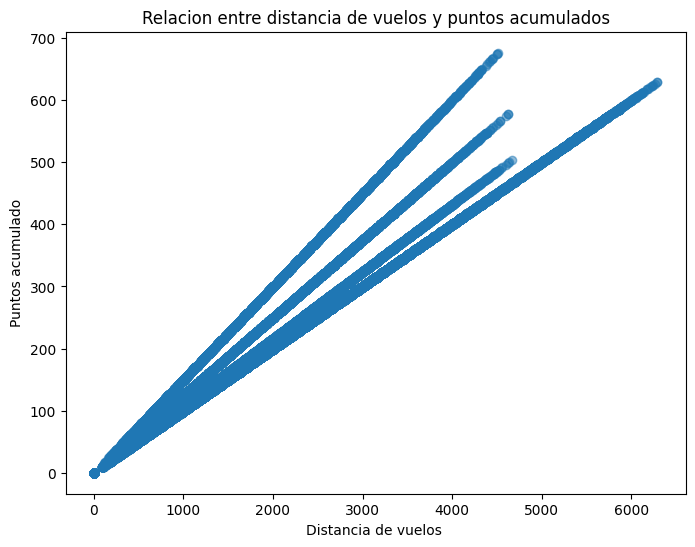

In [58]:
#Creo grafico de dispersion scatterplot

plt.figure(figsize=(8,6))
plt.scatter(df_unido['Distance'], df_unido['Points Accumulated'], alpha=0.5)

# Etiquetas y título de ejes
plt.title('Relacion entre distancia de vuelos y puntos acumulados',);
plt.xlabel('Distancia de vuelos ');
plt.ylabel('Puntos acumulado');




Puedo comprobar aqui que si existe una relacion entre Distancia de vuelo Y puntos acumulados, observando que a mayor kilometros que tengas de viaje, mayor seran los puntos acumulados.

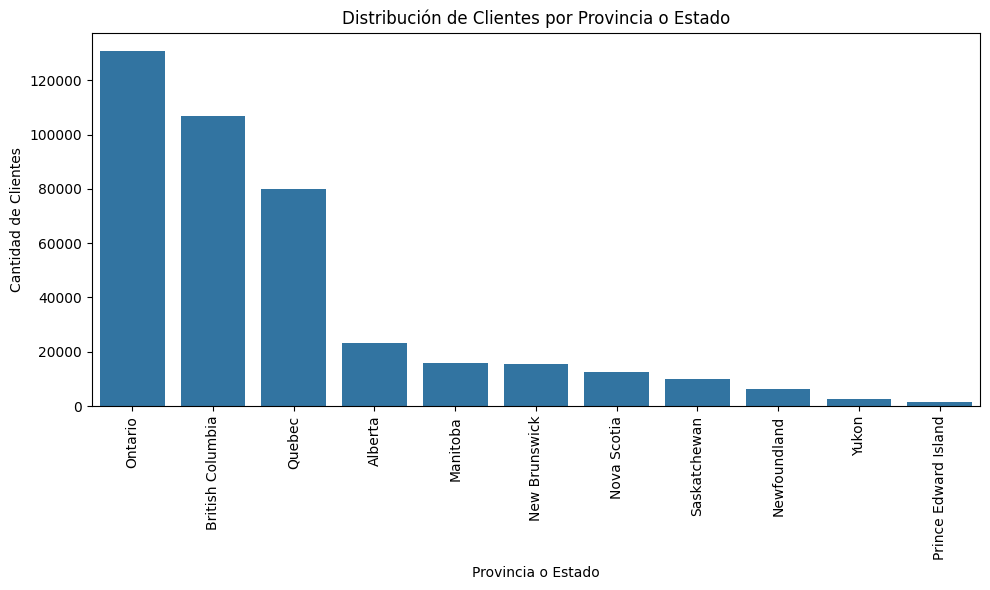

In [ ]:
# 3 :¿Cuál es la distribución de los clientes por provincia o estado?

#tconfiguracion del tamaño de la medida
plt.figure(figsize=(10, 6))

# Creo un gráfico de barras para la distribución de clientes por provincia o estado
sns.countplot(data=df_unido, x="Province", order=df_unido["Province"].value_counts().index)

# Añadir títulos y etiquetas
plt.title('Distribución de Clientes por Provincia o Estado')
plt.xlabel('Provincia o Estado')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=90)  # para rotar las etiquetas del eje X si son largas
plt.tight_layout()  # para ajustar el diseño para que todo el texto sea visible



Observo aqui que la mayor clientela esta en la Provincia o Estado de Ontario, muy seguido de de Britsh Columbia o Quebec, siendo Prince Edward Island el Estado o provincia con menor clientela.

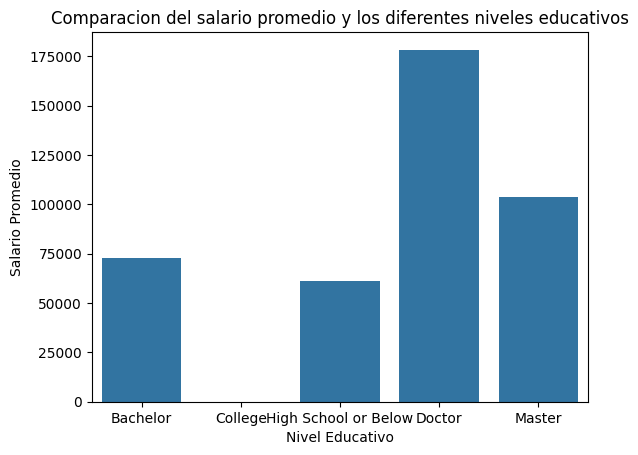

In [61]:
# 4: ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
sns.barplot(data=df_unido, x='Education', y='Salary', estimator=np.mean, ci=None, order=df_unido['Education'].value_counts().index)

# Etiquetas y título
plt.title('Comparacion del salario promedio y los diferentes niveles educativos', fontsize=12);
plt.xlabel('Nivel Educativo', fontsize=10);
plt.ylabel('Salario Promedio', fontsize=10);



Observo en esta grafica que el salario promedio mas alto es para el nivel de educacion de un Doctorado, seguido por el Master.
en College sale 0 porque al ser estudiantes no tienen salario mensual.

In [ ]:
# 5: ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

#Agrupo las tipos de tarjeta de los clientes mediante loyalty card y uso un reset_index para que mantenga el indice numero tradicional.
tarjetas = df_unido.groupby(['Loyalty Card'])['Loyalty Number'].sum().reset_index()
tarjetas


,Loyalty Card,Loyalty Number
0,Aurora,45985723800
1,Nova,75567016512
2,Star,101555821920


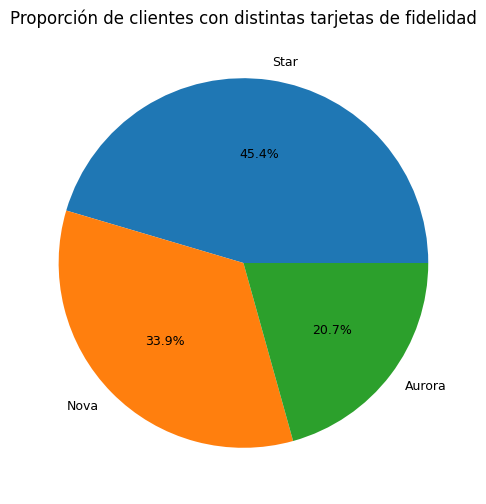

In [63]:
# Contar la cantidad de clientes por tarjetas
tarjetas = df_unido['Loyalty Card'].value_counts()

plt.figure(figsize=(8, 6))  # Tamaño de la figura

# Creo el gráfico (En este caso me atrevo con el grafico de torta o llamada tambien Pie.
plt.pie(tarjetas.values, 
        labels=tarjetas.index,  
        autopct='%1.1f%%',          #Muestra los porcentajes con un decimal en cada porción del gráfico.
        textprops={'fontsize': 9}) 

# Título
plt.title('Proporción de clientes con distintas tarjetas de fidelidad');

Aqui observo que casi la mitad de los clientes usan la tarjeta STAR, seguida por la NOVA y por ultimo Aurora siendo la tarjeta menos utilizada.

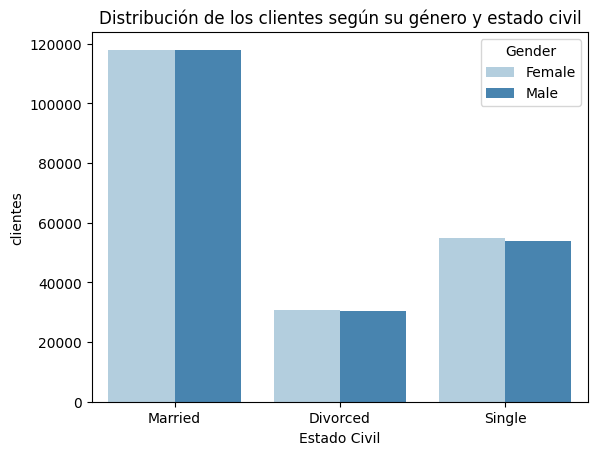

In [64]:
# 6: ¿Cómo se distribuyen los clientes según su estado civil y género?

sns.countplot(x ="Marital Status", data=df_unido,palette="Blues",hue="Gender")  # USO (hue) que me permite desglosar los datos por una segunda variable.
              

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Estado Civil")
plt.ylabel("clientes")
plt.title('Distribución de los clientes según su género y estado civil');


Aqui puedo observar que tanto Hombres como Mujeres tiene una minima diferencia y el Estado civil es igual en los dos generos, prevaleciendo los Casados con un porcentaje mayor.